plot(f::Function, lower, upper, elements...; mapping...)

plot(fs::Vector{T}, lower, upper, elements...; mapping...) where T <: Base.Callable

plot(f::Function, xmin, xmax, ymin, ymax, elements...; mapping...)

spy(M::AbstractMatrix, elements...; mapping...) -> Plot

In [1]:
using Gadfly

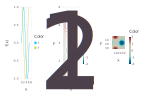

In [2]:
p1 = plot([sin,cos], 0, 2pi)
p2 = plot((x,y)->sin(x)+cos(y), 0, 2pi, 0, 2pi)
p3 = spy(ones(33)*sin.(0:(pi/16):2pi)' + cos.(0:(pi/16):2pi)*ones(33)')
hstack(p1,p2,p3)

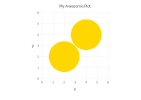

In [3]:
p = plot()
push!(p, layer(x=[2,4], y=[2,4], size=[1.4142], color=[colorant"gold"]))
push!(p, Coord.cartesian(fixed=true))
push!(p, Guide.title("My Awesome Plot"))

In [4]:
using RDatasets
births = RDatasets.dataset("HistData", "Arbuthnot")[:,[:Year, :Males, :Females]]

,Year,Males,Females
,Int64,Int64,Int64
1,1629,5218,4683
2,1630,4858,4457
3,1631,4422,4102
4,1632,4994,4590
5,1633,5158,4839
6,1634,5035,4820
7,1635,5106,4928
8,1636,4917,4605
9,1637,4703,4457


In [5]:
stack(births, [:Males, :Females])

,Year,variable,value
,Int64,String,Int64
1,1629,Males,5218
2,1630,Males,4858
3,1631,Males,4422
4,1632,Males,4994
5,1633,Males,5158
6,1634,Males,5035
7,1635,Males,5106
8,1636,Males,4917
9,1637,Males,4703


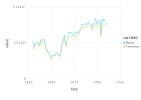

In [6]:
plot(stack(births, [:Males, :Females]), x=:Year, y=:value, color=:variable,
     Geom.line)

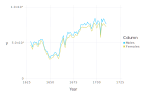

In [7]:
plot(births, x=:Year, y=Col.value(:Males, :Females),
     color=Col.index(:Males, :Females), Geom.line)

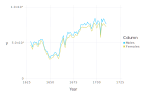

In [8]:
births_array = convert(Matrix{Int}, births)
plot(births_array, x=Col.value(1), y=Col.value(2:3...),
     color=Col.index(2:3...), Geom.line, Scale.color_discrete,
     Guide.colorkey(labels=["Males","Females"]), Guide.xlabel("Year"))

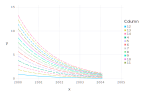

In [9]:
using Dates
palette = Scale.default_discrete_colors(11)
color_rep(nc::Int) = palette[mod1.(1:nc, length(palette))]
n = 14
X = exp.(-0.05*[1:50;]) * permutedims([1:n;])
date1 = collect(Date(2000):Month(1):Date(2004,2,1))
ci = Col.index(1:n...)

plot(X, x=repeat(date1, inner=n),
    y=Col.value(1:n...), color=ci, linestyle=ci,
    Geom.line, Scale.color_discrete(color_rep)
)